# Import Needed Libraries and Functions

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, OneHotEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler #when the distribution is normal
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [35]:
#formatting cells
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)


In [36]:
df = pd.read_csv("CleanedCreditScoreData.csv",low_memory=False)
testdf = pd.read_csv("CleanedCreditScoreData.csv")
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.84,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,_,809.98,26.82,No,49.57,80,High_spent_Small_value_payments,312,Good,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.84,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,19,11.27,4,Good,809.98,31.94,No,49.57,118,Low_spent_Large_value_payments,285,Good,266
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.84,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,Good,809.98,28.61,No,49.57,82,Low_spent_Medium_value_payments,331,Good,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.84,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4,Good,809.98,31.38,No,49.57,199,Low_spent_Small_value_payments,223,Good,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.84,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,19,11.27,4,Good,809.98,24.80,No,49.57,41,High_spent_Medium_value_payments,341,Good,269
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.84,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4,Good,809.98,27.26,No,49.57,62,!@9#%8,340,Good,270
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.84,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8,11.27,4,Good,809.98,22.54,No,49.57,178,Low_spent_Small_value_payments,245,Good,271
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,19114,1824.84,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4,Good,809.98,23.93,No,49.57,25,High_spent_Medium_value_payments,358,Standard,295
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34848,3037.99,2.0,4.0,6.0,1,Credit-Builder Loan,3,4,5.42,2,Good,605.03,24.46,No,18.82,104,Low_spent_Small_value_payments,471,Standard,319
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34848,3037.99,2.0,4.0,6.0,1,Credit-Builder Loan,7,1,7.42,2,Good,605.03,38.55,No,18.82,40,High_spent_Large_value_payments,485,Good,320


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98800 entries, 0 to 98799
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        98800 non-null  object 
 1   Customer_ID               98800 non-null  object 
 2   Month                     98800 non-null  object 
 3   Name                      98800 non-null  object 
 4   Age                       98800 non-null  int64  
 5   SSN                       98800 non-null  object 
 6   Occupation                98800 non-null  object 
 7   Annual_Income             98800 non-null  int64  
 8   Monthly_Inhand_Salary     98800 non-null  float64
 9   Num_Bank_Accounts         98800 non-null  float64
 10  Num_Credit_Card           98800 non-null  float64
 11  Interest_Rate             98800 non-null  float64
 12  Num_of_Loan               98800 non-null  int64  
 13  Type_of_Loan              98800 non-null  object 
 14  Delay_

# Structure the data for ML

In [61]:
df = df.drop(['ID', 'Customer_ID', "SSN", 'Month',"Name","Occupation","Type_of_Loan"], axis=1)


KeyError: "['ID', 'Customer_ID', 'SSN', 'Month', 'Name', 'Occupation', 'Type_of_Loan'] not found in axis"

In [64]:
col_to_drop = ['ID', 'SSN', 'Type_of_Loan', 'Customer_ID', 'Occupation', 'Name', 'Month']
numeric_cols = ['Age', 'Annual_Income', 'Num_Bank_Accounts', "Monthly_Inhand_Salary",
                'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Months', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

categorical_cols = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

target_col = ['Credit_Score']

feature_encoder = OrdinalEncoder()
target_encoder = LabelEncoder()

In [78]:
train_processed = full_pipeline.fit_transform(df)
train_processed

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months,debt_to_income_ratio
0,-0.958936,-0.109628,-0.735499,-0.947196,-0.714640,-1.317912,0.199975,-1.215326,-0.316903,0.131243,-0.153655,1.401755,-0.531559,-1.074992,-0.580593,-0.162953,-0.347964,-0.220186,-0.423542,0,0.439299,-0.206353
1,-0.958936,-0.109628,-0.735499,-0.947196,-0.714640,-1.317912,0.199975,-1.484840,0.191076,0.131243,-0.153655,-0.573787,-0.531559,-0.073291,-0.580593,-0.162953,-0.334294,0.272474,-0.549770,0,0.449402,-0.206353
2,-0.958936,-0.109628,-0.735499,-0.947196,-0.714640,-1.317912,0.199975,-1.215326,-0.316903,0.131243,-0.153655,-0.573787,-0.531559,-0.724788,-0.580593,-0.162953,-0.347244,0.765134,-0.334714,0,0.459506,-0.206353
3,-0.958936,-0.109628,-0.735499,-0.947196,-0.714640,-1.317912,0.199975,-1.080570,-0.443898,-0.606271,-0.153655,-0.573787,-0.531559,-0.182852,-0.580593,-0.162953,-0.305154,1.257794,-0.839628,0,0.469609,-0.206353
4,-0.958936,-0.109628,-0.735499,-0.947196,-0.714640,-1.317912,0.199975,-1.013191,0.191076,0.131243,-0.153655,-0.573787,-0.531559,-1.470195,-0.580593,-0.162953,-0.361994,-0.712846,-0.287963,0,0.479712,-0.206353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98795,-0.773458,-0.095243,-0.251202,-0.589366,0.210751,-0.860114,-0.619824,0.132240,-0.316903,0.165168,-0.215103,1.401755,-0.798639,0.458863,-0.580593,-0.164692,-0.354799,-1.205506,0.361880,1,1.580990,-0.545629
98796,-0.773458,-0.095243,-0.251202,-0.589366,0.210751,-0.860114,-0.619824,-0.204651,-0.316903,0.165168,-0.215103,1.401755,-0.798639,1.615124,-0.580593,-0.164692,-0.357317,-0.712846,0.441357,1,1.591093,-0.545629
98797,-0.773458,-0.095243,-0.251202,-0.589366,0.210751,-0.860114,-0.619824,0.401754,-0.359235,0.165168,-0.215103,-0.573787,-0.798639,1.750118,-0.580593,-0.164692,-0.368110,-1.205506,0.534859,1,1.601197,-0.545629
98798,-0.773458,-0.095243,-0.251202,-0.589366,0.210751,-0.860114,-0.619824,-0.069895,0.191076,0.165168,-0.215103,-0.573787,-0.798639,0.259305,-0.580593,-0.164692,-0.286088,0.272474,-0.390816,2,1.611300,-0.545629


In [80]:
#train_test_split
X = train_processed.drop(['Credit_Score'], axis=1)
y = train_processed['Credit_Score']

# Train-test split (80/20)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [70]:
#encode the data
class DataFrameStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_cols=None):
        self.scaler = StandardScaler()
        self.columns = None
        self.exclude_cols = exclude_cols if exclude_cols is not None else []

    def fit(self, X, y=None):
        # Select only columns to scale
        self.columns = [col for col in X.columns if col not in self.exclude_cols]
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X_scaled = X.copy()
        # Only scale numeric columns that were fitted
        X_scaled[self.columns] = self.scaler.transform(X_scaled[self.columns])
        return X_scaled

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import numpy as np
import pandas as pd

class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_cols=None, categorical_cols=None, target_col=None, col_to_drop=None):
        self.numeric_cols = numeric_cols
        self.categorical_cols = categorical_cols
        self.target_col = target_col
        self.col_to_drop = col_to_drop
        self.feature_encoder = OrdinalEncoder()
        self.target_encoder = LabelEncoder()

    def fit(self, df, y=None):
        df = df.copy()

        if self.categorical_cols:
            self.feature_encoder.fit(df[self.categorical_cols])

        if self.target_col:
            self.target_encoder.fit(df[self.target_col[0]])

        return self

    def transform(self, df):
        df = df.copy()

        # Drop unnecessary columns if provided
        if self.col_to_drop:
            df.drop(columns=self.col_to_drop, errors='ignore', inplace=True)

        # Encode categorical columns
        if self.categorical_cols:
            df[self.categorical_cols] = self.feature_encoder.transform(df[self.categorical_cols])

        # Encode target column if provided
        if self.target_col:
            df[self.target_col[0]] = self.target_encoder.transform(df[self.target_col[0]])

        # Create new engineered feature
        df['debt_to_income_ratio'] = np.where(
            df['Annual_Income'] > 0,
            df['Outstanding_Debt'] / df['Annual_Income'],
            0
        )

        # Fill missing numeric values
        df.fillna(df.mean(), inplace=True)

        return df


In [ ]:
#code to remove repeat entries, will consider implementing
#df.drop_duplicates(subset='Name', keep='first', inplace=True)
#df.drop(columns=self.col_to_drop, axis=1, inplace=True)


In [74]:
#enhancing features
df['debt_to_income_ratio'] = np.where( 
    df['Annual_Income'] > 0,
    df['Outstanding_Debt'] / df['Annual_Income'],
    0
)
#this code checks for the ammount of debt relative to a persons income


In [76]:
full_pipeline = Pipeline([
    ('preprocess', Preprocessor(
        numeric_cols=numeric_cols,
        categorical_cols=categorical_cols,
        target_col=target_col,
        col_to_drop=col_to_drop
    )),
    ('scaler', DataFrameStandardScaler(exclude_cols = target_col))
])

# Test various ML Models

In [ ]:
#Training
x_train , y_train = train_processed.drop(['Credit_Score'] , axis=1) , train_processed[['Credit_Score']]
test_df = pd.read_csv("Credit_test.csv")

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Create model with class balancing
RFC = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define F1 scorer (macro averages across classes)
f1_macro = make_scorer(f1_score, average='macro')

# Use stratified K-fold to preserve class proportions
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
CVS = cross_val_score(RFC, x_train, y_train.values.ravel(), cv=SKF, scoring=f1_macro)

print("F1 macro scores for each fold:", CVS)
print("Mean F1 macro:", CVS.mean())

F1 macro scores for each fold: [0.76907422 0.76646361 0.77313374 0.77477126 0.77239002]
Mean F1 macro: 0.7711665692627514


In [82]:
#trained DTC model
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [84]:
#stratified K fold
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

y_pred = tree_clf.predict(x_train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(tree_clf, x_train, y_train.values.ravel(), cv=cv, scoring='f1_macro')
f1 = f1_scores.mean()
print("F1 macro score for DecisionTreeClassifier:", f1)

F1 macro score for DecisionTreeClassifier: 0.6676671294457467


In [86]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Train logistic regression with class balancing
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg_f1_scores = cross_val_score(logreg, x_train, y_train.values.ravel(), cv=cv, scoring='f1_macro')
logreg_f1 = logreg_f1_scores.mean()
print("F1 macro scores for each fold (LogisticRegression):", logreg_f1_scores)
print("Mean F1 macro (LogisticRegression):", logreg_f1)

F1 macro scores for each fold (LogisticRegression): [0.6047706  0.60335719 0.60575359 0.60346522 0.60739511]
Mean F1 macro (LogisticRegression): 0.6049483419543031


In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

xgb_clf = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_scores = cross_val_score(xgb_clf, x_train, y_train.values.ravel(), cv=cv, scoring='f1_macro')

print("XGBoost F1 scores:", xgb_scores)
print("Mean F1 macro:", xgb_scores.mean())

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/opt/anaconda3/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Symbol not found: ___kmpc_dispatch_deinit\n  Referenced from: <4ED95924-16D7-331E-8C6F-F25023ED13D1> /opt/anaconda3/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Expected in:     <8AE74FFC-75EE-374B-BA46-A70944EA81BD> /opt/anaconda3/lib/libomp.dylib']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train a model and get feature importance
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(x_train, y_train.values.ravel())

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Most Important Features for Credit Score Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

# Vizualizing Accuracy

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

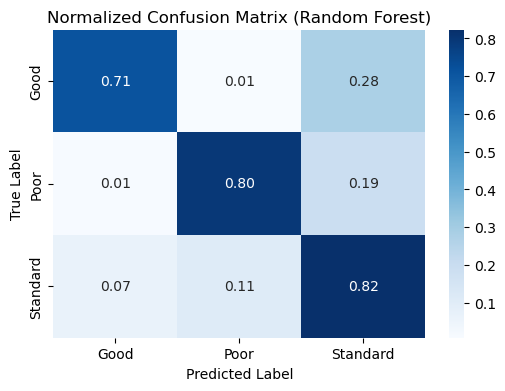

              precision    recall  f1-score   support

        Good       0.77      0.71      0.74      3516
        Poor       0.79      0.80      0.80      5730
    Standard       0.81      0.82      0.81     10514

    accuracy                           0.80     19760
   macro avg       0.79      0.78      0.78     19760
weighted avg       0.80      0.80      0.80     19760



In [94]:
# visualize predictions from best performing model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = rf_clf.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Decode label names back to original classes (Good, Standard, Poor)
label_names = full_pipeline.named_steps['preprocess'].target_encoder.classes_

# Create DataFrame for display
cm_df = pd.DataFrame(cm, index=label_names, columns=label_names)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_names))
